# Cyclic valued data, i.e. $\mathbb{S}_1$, on line-graph, i.e. $\mathbb{S}_1$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import imp
import relaxed_tikhonov_sphere

N = 1000
iter = 300
tau = 0.1
rho = 1
lam = 10

In [31]:
imp.reload(relaxed_tikhonov_sphere)

<module 'relaxed_tikhonov_sphere' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [35]:
Noise, Data = relaxed_tikhonov_sphere.sample_vMF_signal(50,2,10)

normalization test :  1.0


### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ADMM : solving the complex-valued S_1-model proposed by Condat ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem 

In [36]:
lamr = 10

q, dataadmm = relaxed_tikhonov_sphere.ADMM_red(Noise, Data, 2.5*lamr, 3.0*rho, 1*iter+1, 5)

iteration 	| func-value 	| marginal-cost 	| sherical-error
--------------------------------------------------------------------------
0 		| -7.817e+04 	|  2.507e+03 		|  9.930e-01
50 		|  5.649e+01 	|  5.577e+01 		|  5.435e-05
100 		|  5.577e+01 	|  5.577e+01 		| -1.233e-08
iteration : 127 3.4813199043273926
150 		|  5.577e+01 	|  5.577e+01 		| -2.348e-10
200 		|  5.577e+01 	|  5.577e+01 		| -2.571e-12
250 		|  5.577e+01 	|  5.577e+01 		| -3.464e-14
300 		|  5.577e+01 	|  5.577e+01 		| -4.441e-16
162 55.769799814474865 4.445956707000732
55.7697978567244 5.797944784164429
finale 		|  5.577e+01 	|  5.577e+01 		| sphered


In [16]:
print('RMSE(Solution) \t=', "%10.3e"%(np.sqrt(np.sum((q - Data))**2)/1000), ' \t\t| RMSE(Noise) \t=', "%10.3e"%(np.sqrt(np.sum((Noise - Data))**2)/1000)) 
print('MAE(Solution) \t=', "%10.3e"%(np.sum(np.abs(q - Data)/1000)), ' \t\t| MAE(Noise) \t=', "%10.3e"%(np.sum(np.abs(Noise - Data)/1000))) 
print('cMSE(Solution) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/1000), ' \t\t| cMSE(Noise) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(Noise*Data,0))**2)/1000)) 

RMSE(Solution) 	=  3.380e-03  		| RMSE(Noise) 	=  2.814e-02
MAE(Solution) 	=  1.071e-01  		| MAE(Noise) 	=  3.168e-01
cMSE(Solution) 	=  2.533e-02  		| cMSE(Noise) 	=  1.013e-01


In [32]:
q1, database = relaxed_tikhonov_sphere.baseline(Noise, Data, 2.5*lamr, 6*iter+1, 0)

iter. 		| func-value 	| non-convex-cost 	| solution is
--------------------------------------------------------------------------
0 		|  2.596e+04 	|  2.449e+03 		| unsphered
100 		|  1.647e+04 	|  1.033e+02 		| unsphered
200 		|  8.772e+03 	|  1.024e+02 		| unsphered
300 		|  5.396e+03 	|  1.025e+02 		| unsphered
400 		|  4.085e+03 	|  1.025e+02 		| unsphered
500 		|  3.594e+03 	|  1.026e+02 		| unsphered
600 		|  3.413e+03 	|  1.026e+02 		| unsphered
700 		|  3.346e+03 	|  1.026e+02 		| unsphered
800 		|  3.321e+03 	|  1.026e+02 		| unsphered
900 		|  3.312e+03 	|  1.026e+02 		| unsphered
1000 		|  3.309e+03 	|  1.026e+02 		| unsphered
1100 		|  3.307e+03 	|  1.026e+02 		| unsphered
1200 		|  3.307e+03 	|  1.026e+02 		| unsphered
1300 		|  3.307e+03 	|  1.026e+02 		| unsphered
1400 		|  3.307e+03 	|  1.026e+02 		| unsphered
1500 		|  3.307e+03 	|  1.026e+02 		| unsphered
1600 		|  3.307e+03 	|  1.026e+02 		| unsphered
1700 		|  3.307e+03 	|  1.026e+02 		| unsphered
1800 		|  3.307e+0

In [21]:
q2, datapmm = relaxed_tikhonov_sphere.PMM_S1(Noise[0,:] + 1j*Noise[1,:], Data[0,:] + 1j*Data[1,:], 2.5*lamr, iter+1, 0.1, 0, 5)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
-----------------------------------------------------------------------
0 		| -3.656e+04 	|   2.498e+03 		|  9.000e-01
50 		|  7.483e+01 	|   6.458e+01 		|  6.161e-03
100 		|  6.318e+01 	|   6.278e+01 		|  5.972e-03
150 		|  6.335e+01 	|   5.500e+01 		|  5.934e-03
200 		|  6.347e+01 	|   4.778e+01 		|  5.793e-03
250 		|  6.352e+01 	|   4.247e+01 		|  5.640e-03
300 		|  6.357e+01 	|   3.869e+01 		|  5.456e-03
finale 		|  7.536e+01 	|   3.869e+01 		|  unsphered
300 63.56659500437828 7.760993003845215


In [33]:
qq, dataadmmqq = relaxed_tikhonov_sphere.ADMM_S1(Noise[0,:] + 1j*Noise[1,:], Data[0,:] + 1j*Data[1,:], 2.5*lamr, 3.0*rho, iter+1, 5)

iteration 	| func-value 	| maginal-cost 	| non-convex-cost 	| spherical-error
------------------------------------------------------------------------------------------
0 		| -7.817e+04 	|  2.573e+04 	|  2.498e+03 		|  9.165e-01
100 		|  6.335e+01 	|  2.863e+02 	|  6.351e+01 		|  6.058e-03
200 		|  6.354e+01 	|  2.814e+02 	|  4.952e+01 		|  5.834e-03
300 		|  6.362e+01 	|  2.744e+02 	|  3.993e+01 		|  5.524e-03
finale 		|  2.744e+02 	|  7.662e+01 				| unsphered
300 63.61835825175551 7.364978790283203


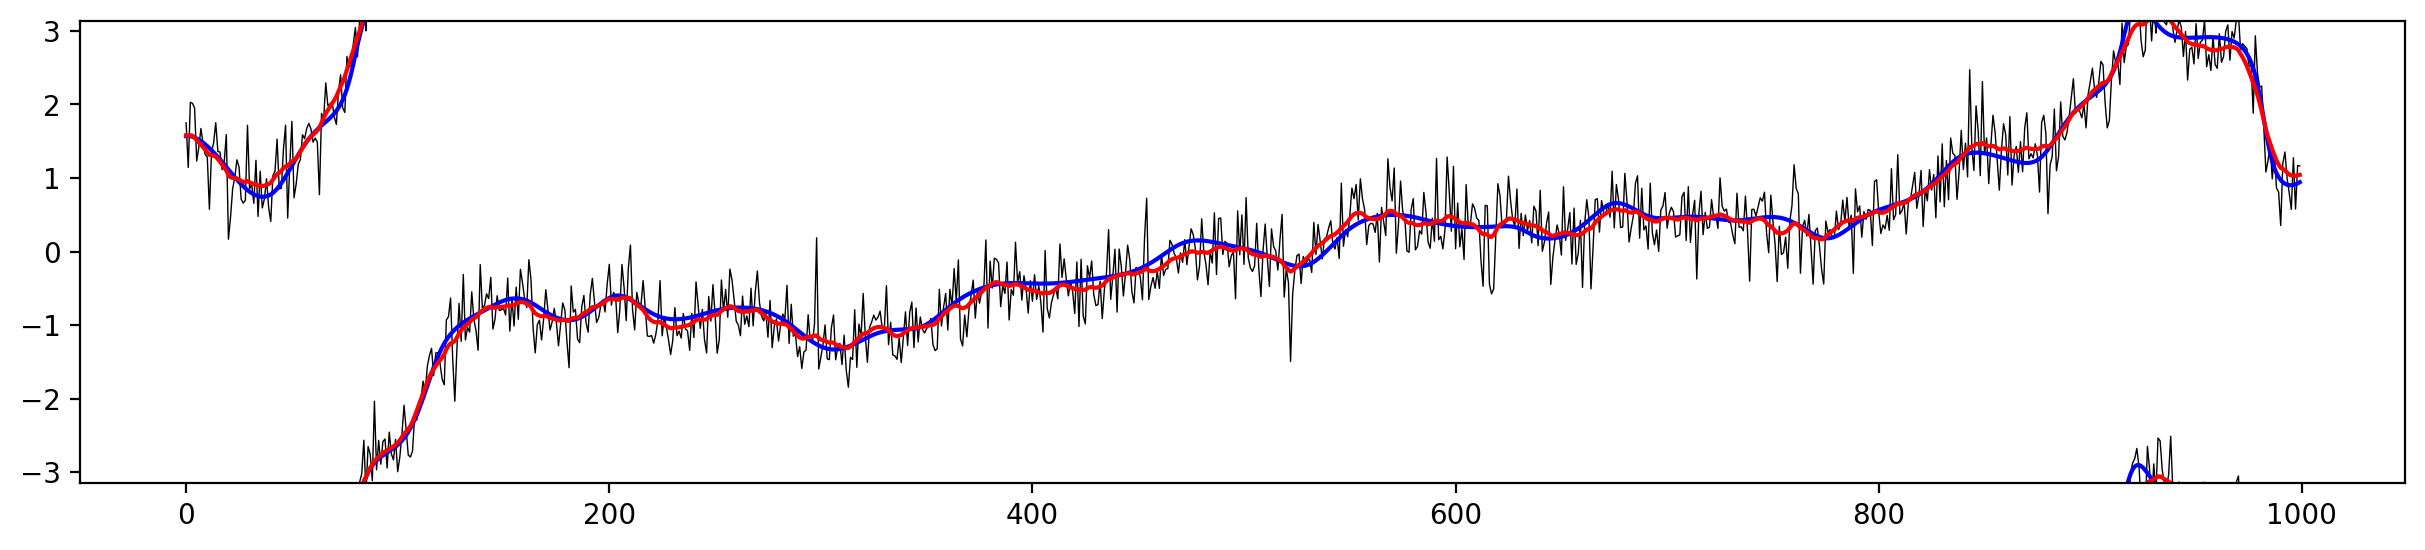

In [37]:
relaxed_tikhonov_sphere.plotS1(Noise, Data, q)